In [234]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import libraries to visualize data
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# make numbers float
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [179]:
# load data and show it
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L






---


# preprocessing 


---



In [180]:
# drop unnecessary columns
df.drop('Unnamed: 0',axis =1,inplace=True)

In [181]:
# explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [182]:
# check nan values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [183]:
#check duplicates
df.duplicated().sum()

42

In [184]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [185]:
df.duplicated().sum()

0

In [186]:
#Replacing some of the values to understand the graphs clearly
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)

In [187]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,L




---


# Explore the data 


---







# Experience Level



In [188]:
df['experience_level'].groupby(df['work_year']).value_counts()

work_year  experience_level
2020       MI                   32
           EN                   20
           SE                   18
           EX                    2
2021       MI                   88
           SE                   69
           EN                   47
           EX                   11
2022       SE                  156
           MI                   88
           EN                   21
           EX                   13
Name: experience_level, dtype: int64

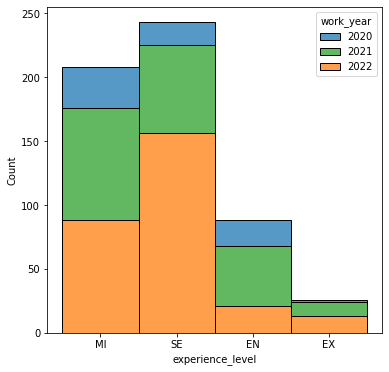

In [189]:
plt.figure(figsize = (6,6))
sns.histplot(data = df ,x = 'experience_level' , hue = 'work_year' ,palette = ['tab:blue', 'tab:green', 'tab:orange'],multiple="stack")
plt.show()

In [254]:
sal_per_exp_level = df.groupby('experience_level').mean()['salary_in_usd']

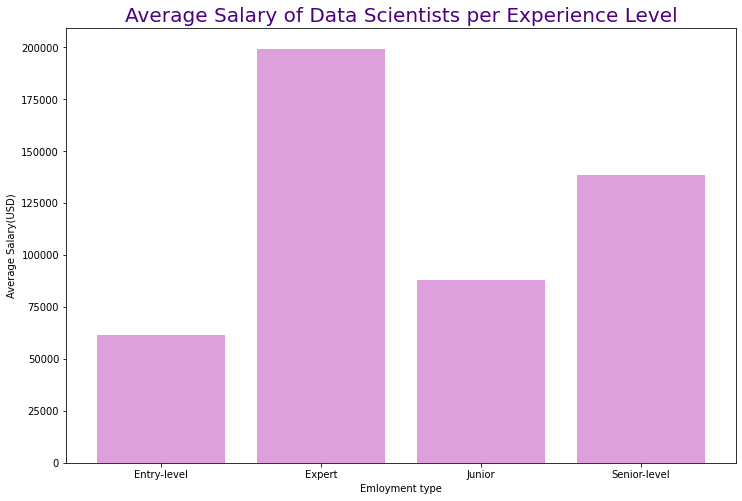

In [257]:
plt.figure(figsize=(12,8))
plt.bar(sal_per_exp_level.index, sal_per_exp_level.values ,color = 'plum')
plt.xlabel('Emloyment type')
plt.ylabel('Average Salary(USD)')
xticks=['Entry-level','Expert','Junior','Senior-level']
plt.xticks(range(len(xticks)), xticks)
plt.title('Average Salary of Data Scientists per Experience Level', size=20, color='indigo');

> according the above statical result and graph we can say          
1- over time, there is increase in the job of DS opportunities     
2- the most experience level position is [SE , MI] unlike [ EX ] is the  lowest position avaliable   
3- exprt level is the highest salary (the higher the experince level the higher the salary)

#  Employment Type

In [190]:
df['employment_type'].groupby(df['work_year']).value_counts()

work_year  employment_type
2020       FT                  68
           PT                   2
           CT                   1
           FL                   1
2021       FT                 204
           PT                   6
           CT                   3
           FL                   2
2022       FT                 274
           PT                   2
           CT                   1
           FL                   1
Name: employment_type, dtype: int64

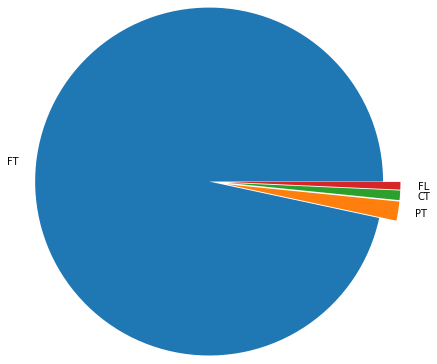

In [191]:
employ_type = df['employment_type'].value_counts()

plt.pie(employ_type.values, labels= employ_type.index,explode= [0,0.2,0.2,0.2],radius =2)
plt.show() 

In [250]:
sal_per_emp_type = df.groupby('employment_type').mean()['salary_in_usd']

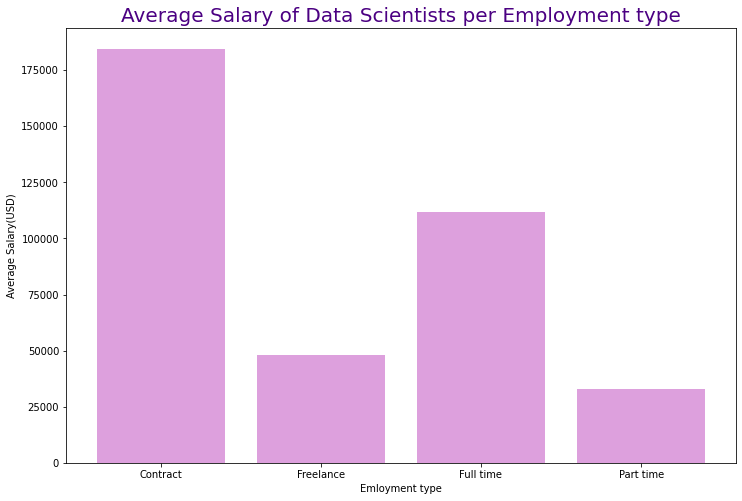

In [251]:
plt.figure(figsize=(12,8))
plt.bar(sal_per_emp_type.index, sal_per_emp_type.values ,color = 'plum')
plt.xlabel('Emloyment type')
plt.ylabel('Average Salary(USD)')
xticks=['Contract','Freelance','Full time','Part time']
plt.xticks(range(len(xticks)), xticks)
plt.title('Average Salary of Data Scientists per Employment type', size=20, color='indigo');

> according the above statical result and graph we can say           
1- almost all  type of employement for the role is Full-time
2- salary of contract is the higher

# Salary

In [262]:
df['salary_in_usd'].describe()

count      565.00000
mean    110610.34336
std      72280.70279
min       2859.00000
25%      60757.00000
50%     100000.00000
75%     150000.00000
max     600000.00000
Name: salary_in_usd, dtype: float64

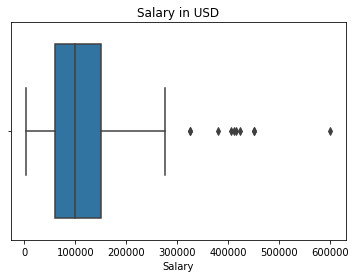

In [261]:
sns.boxplot(data = df ,x='salary_in_usd')
plt.title('Salary in USD')
plt.xlabel('Salary')
plt.show()

In [264]:
len(df[df['salary'] > 290000])

46

In [266]:
df[df['salary_in_usd'] > 280000].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,Remote,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,On-site,US,M
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,Remote,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,Remote,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,Hybrid,US,L


In [267]:
df[df['salary_in_usd'] > 280000]['experience_level'].value_counts()

EX    4
MI    3
SE    3
Name: experience_level, dtype: int64

- Given the third row we see that it's impossible to find a job (data engineer) with entry level experince with 4.4 M dollar per year it's obviously wrong data
> according to website:   
https://www.indeed.com/jobs?q=data%20scientist%20%24145%2C000&l=United%20States&sc=0kf%3Ajt(fulltime)%3B&vjk=cb8c953fc248971d   
- the salary of DS jobs is between 200K to 300K per year in US
so the graph and statics show that there is outliers in the data about 46



In [268]:
new_df = df[df['salary_in_usd'] < 280000]
new_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,L


In [269]:
new_df['salary_in_usd'].describe()

count      555.00000
mean    105062.78198
std      58981.19267
min       2859.00000
25%      60000.00000
50%     100000.00000
75%     145500.00000
max     276000.00000
Name: salary_in_usd, dtype: float64

In [270]:
sal_change =df.groupby('work_year')['salary_in_usd'].mean()

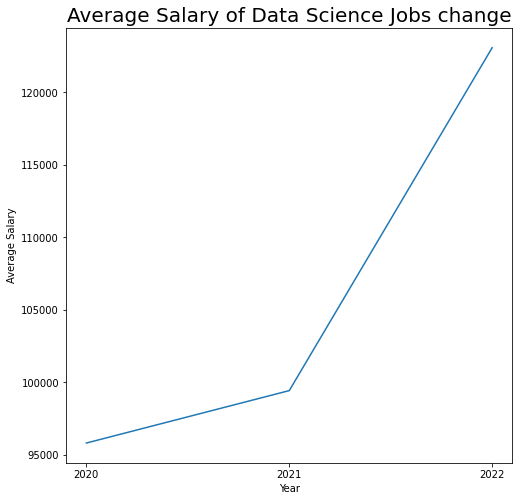

In [271]:
plt.figure(figsize=(8,8))
sns.lineplot(x=sal_change.index,y=sal_change.values)

xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science Jobs change', size=20);

- it's clear that the salary of DS Jobs increases over time

# Job title

In [200]:
jobs = df.groupby('job_title').size().sort_values(ascending = False)
jobs.head()

job_title
Data Scientist               130
Data Engineer                121
Data Analyst                  82
Machine Learning Engineer     39
Research Scientist            16
dtype: int64

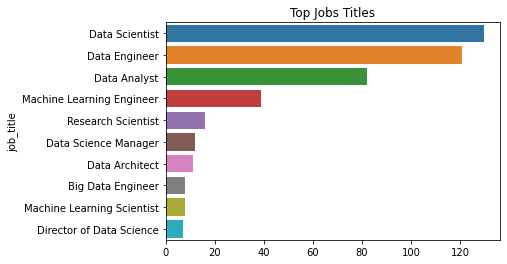

In [201]:
sns.barplot(x=jobs.values[:10],y=jobs.index[:10])
plt.title('Top Jobs Titles')
plt.show()

- the graph show the top 10 jobs required

# Remote Ratio

In [275]:
px.histogram(df, x='remote_ratio',color='work_year', barmode='group',title="Count of each Work Type Over Years")

- after 2020 most Comapny tends to work Remote according to the above Graph especially in 2022

# Company Size

Text(0.5, 1.0, 'No.of Company size')

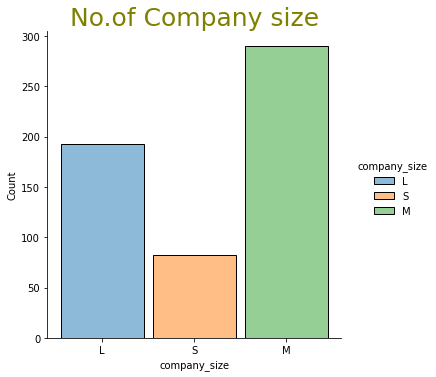

In [233]:
sns.displot(df,x='company_size',hue='company_size',shrink=0.9);
plt.title('No.of Company size',size=25,color='olive')

In [274]:
px.histogram(df, x='company_size',color='work_year', barmode='group',title="Count of each Company Size Over Years")

- The average number of people that worked for Most company is between 50 to 250 employee

# Company Location

In [281]:
com_location_av_sal = df.groupby('company_location').mean()['salary_in_usd'].sort_values(ascending = False)

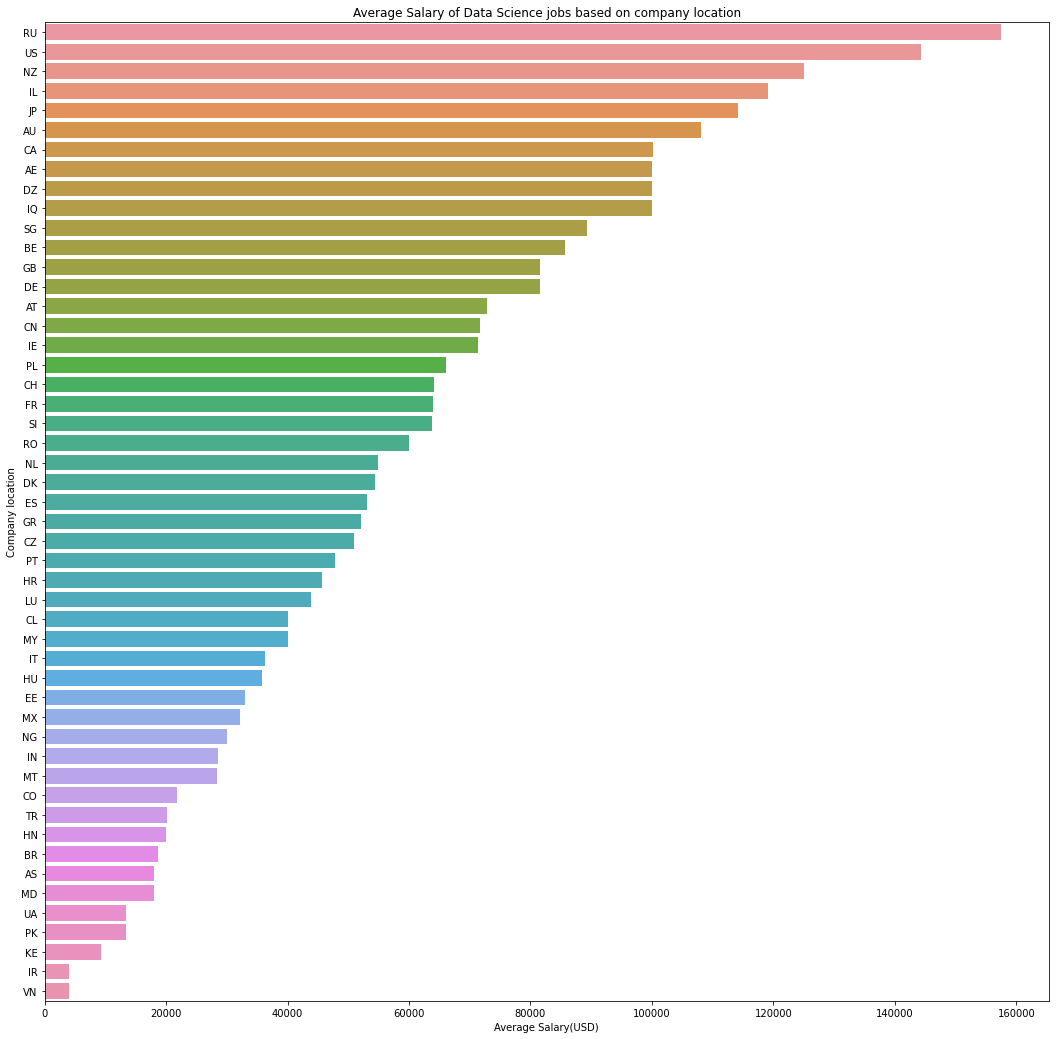

In [282]:
plt.figure(figsize=(18,18))
sns.barplot(x=com_location_av_sal.values,y=com_location_av_sal.index)
plt.ylabel('Company location')
plt.xlabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company location');

- The Highest Salary is in Russia then United State

# Salary Currency

In [283]:
sal_curr = df['salary_currency'].value_counts()

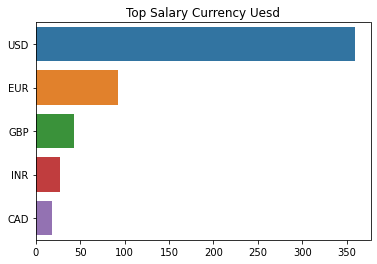

In [284]:
sns.barplot(x=sal_curr.values[:5],y=sal_curr.index[:5])
plt.title('Top Salary Currency Uesd')
plt.show()

- Show the Top 5 salary currency used to pay Salaries